# The Butterfly Effect

## Introduction

### Data preparation

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### Dataset 1 - Butterfly Monitoring Scheme

The original file is about 3Go, I passed the following commands:
- df_UKBMS = pd.read_csv('data/butterfliesUK.csv', delimiter='\t')
  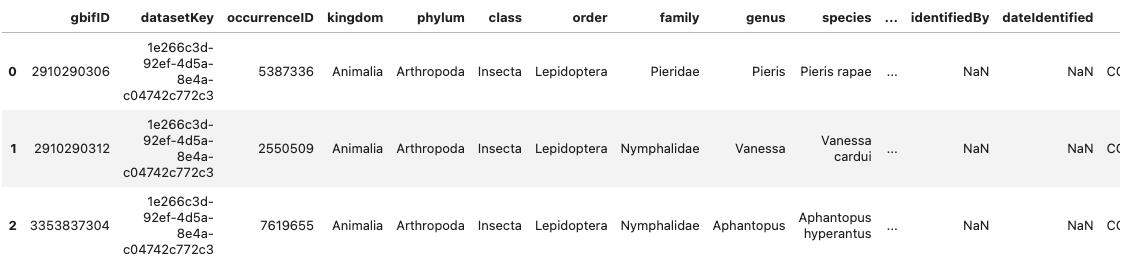
- df_UKBMS.shape => (5832272, 50)
- df_UKBMS.columns => Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')


I dropped the columns with no information or the exact same information throughout all rows:
- df_UKBMS2 = df_UKBMS.drop(columns=['datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class', 'order', \
                          'infraspecificEpithet', 'taxonRank', 'scientificName', 'verbatimScientificNameAuthorship',\
                          'locality', 'occurrenceStatus', 'individualCount', 'publishingOrgKey', 'coordinateUncertaintyInMeters',\
                          'coordinatePrecision', 'elevation', 'elevationAccuracy', 'depth', 'depthAccuracy', \
                          'basisOfRecord', 'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber', \
                          'identifiedBy', 'dateIdentified', 'license', 'rightsHolder', 'recordedBy', 'typeStatus', \
                          'establishmentMeans', 'lastInterpreted', 'mediaType', 'issue'])
- df_UKBMS2.shape: (5832272, 15)
- df_UKBMS2.to_csv('df_butterflies_clean.csv')

In [2]:
df_UKBMS2 = pd.read_csv('data/UKBMS_butterflies_clean.csv')

In [3]:
df_UKBMS2.head(3)

Unnamed: 0      gbifID       family       genus                species  \
0           0  2910290306     Pieridae      Pieris           Pieris rapae   
1           1  2910290312  Nymphalidae     Vanessa         Vanessa cardui   
2           2  3353837304  Nymphalidae  Aphantopus  Aphantopus hyperantus   

  verbatimScientificName countryCode stateProvince  decimalLatitude  \
0           Pieris rapae          GB       England        51.438260   
1         Vanessa cardui          GB       England        52.563293   
2  Aphantopus hyperantus          GB       England        52.250415   

   decimalLongitude   eventDate  day  month  year  taxonKey  speciesKey  
0         -0.238955  2007-06-17   17      6  2007   1920496     1920496  
1         -0.312267  2019-08-29   29      8  2019   4299368     4299368  
2          1.609902  2005-07-09    9      7  2005   1896841     1896841

In [4]:
df_UKBMS2.shape

(5832272, 16)

In [5]:
# Checking if we have missing values
df_UKBMS2.isna().sum()

Unnamed: 0                0
gbifID                    0
family                    0
genus                     0
species                   0
verbatimScientificName    0
countryCode               0
stateProvince             0
decimalLatitude           0
decimalLongitude          0
eventDate                 0
day                       0
month                     0
year                      0
taxonKey                  0
speciesKey                0
dtype: int64

In [6]:
# Checking if we have duplicated rows
df_UKBMS2.duplicated().sum()

0

In [7]:
df_UKBMS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832272 entries, 0 to 5832271
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   gbifID                  int64  
 2   family                  object 
 3   genus                   object 
 4   species                 object 
 5   verbatimScientificName  object 
 6   countryCode             object 
 7   stateProvince           object 
 8   decimalLatitude         float64
 9   decimalLongitude        float64
 10  eventDate               object 
 11  day                     int64  
 12  month                   int64  
 13  year                    int64  
 14  taxonKey                int64  
 15  speciesKey              int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 711.9+ MB


In [33]:
df_UKBMS2['eventDate'] = pd.to_datetime(df_UKBMS2['eventDate'])

In [8]:
df_UKBMS2.groupby('species')['verbatimScientificName'].nunique().describe()

count    71.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: verbatimScientificName, dtype: float64

#### Dataset 2 - LepTraits

LepTraits: A globally comprehensive dataset of butterfly traits.
https://www.nature.com/articles/s41597-022-01473-5 

Lepidoptera or lepidopterans is an order of winged insects that includes butterflies and moths. 

In [9]:
df_LepTraits = pd.read_csv('data/LepTraits_consensus.csv')
df_LepTraits.head()

Family    Genus                 Species         verbatimSpecies  \
0  Hesperiidae  Abantis  Abantis arctomarginata  Abantis arctomarginata   
1  Hesperiidae  Abantis        Abantis bamptoni        Abantis bamptoni   
2  Hesperiidae  Abantis         Abantis bergeri         Abantis bergeri   
3  Hesperiidae  Abantis         Abantis bicolor         Abantis bicolor   
4  Hesperiidae  Abantis       Abantis bismarcki       Abantis bismarcki   

   WS_L_Fem  WS_U_Fem  WS_L_Mal  WS_U_Mal  WS_L  WS_U  ...  \
0       NaN       NaN       NaN       NaN   NaN   NaN  ...   
1       NaN       NaN       NaN       NaN   NaN   NaN  ...   
2       NaN       NaN       NaN       NaN   NaN   NaN  ...   
3       NaN       NaN       NaN       NaN   NaN   NaN  ...   
4       NaN       NaN       NaN       NaN   NaN   2.0  ...   

               EdgeAffinity                      MoistureAffinity  \
0                       NaN                                   NaN   
1                       NaN                                   NaN   
2                       NaN                                   NaN   
3  Edge-associated (strong)  No evidence for moisture association   
4   Edge association varies             Xeric-associated (strong)   

   DisturbanceAffinity  NumberOfHostplantFamilies  SoleHostplantFamily  \
0                  NaN                        1.0       Phyllanthaceae   
1                  NaN                        1.0       Phyllanthaceae   
2                  NaN                        NaN                  NaN   
3                  NaN                        1.0            Malvaceae   
4                  NaN                        1.0       Phyllanthaceae   

   PrimaryHostplantFamily  SecondaryHostplantFamily  EqualHostplantFamily  \
0                     NaN                       NaN                   NaN   
1                     NaN                       NaN                   NaN   
2                     NaN                       NaN                   NaN   
3                     NaN                       NaN                   NaN   
4                     NaN                       NaN                   NaN   

   NumberOfHostplantAccounts     DateCreated  
0                        1.0  3/9/2022 15:23  
1                        1.0  3/9/2022 15:23  
2                        NaN  3/9/2022 15:23  
3                        1.0  3/9/2022 15:23  
4                        1.0  3/9/2022 15:23  

[5 rows x 43 columns]

In [131]:
df_LepTraits.shape

(12448, 43)

In [132]:
df_LepTraits['verbatimSpecies'].value_counts()

verbatimSpecies
Celastrina ladon      5
Polyommatus icarus    4
Plebejus idas         4
Appias paulina        4
Chioides catillus     4
                     ..
Hyrcanana sartha      1
Iaspis castitas       1
Iaspis grandis        1
Iaspis ornata         1
Zemeros flegyas       1
Name: count, Length: 12165, dtype: int64

In [10]:
df_LepTraits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12448 entries, 0 to 12447
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Family                     12448 non-null  object 
 1   Genus                      12448 non-null  object 
 2   Species                    12448 non-null  object 
 3   verbatimSpecies            12448 non-null  object 
 4   WS_L_Fem                   1041 non-null   float64
 5   WS_U_Fem                   2198 non-null   float64
 6   WS_L_Mal                   1133 non-null   float64
 7   WS_U_Mal                   2497 non-null   float64
 8   WS_L                       3594 non-null   float64
 9   WS_U                       6813 non-null   float64
 10  FW_L_Fem                   0 non-null      float64
 11  FW_U_Fem                   0 non-null      float64
 12  FW_L_Mal                   0 non-null      float64
 13  FW_U_Mal                   0 non-null      flo

In [ ]:
# Checking values in columns

#### Dataset 3 - Butterflies Red List

In [11]:
df_redlist = pd.read_csv('data/Butterflies_RedList.csv')
df_redlist.head()

Species    Species_ScientificName Red List category  \
0        Swallowtail           Papilio machaon        Vulnerable   
1      Dingy Skipper             Erynnis tages     Least Concern   
2   Grizzled Skipper             Pyrgus malvae        Vulnerable   
3  Chequered Skipper  Carterocephalus palaemon     Least Concern   
4      Essex Skipper        Thymelicus lineola     Least Concern   

                                 Qualifying criteria  \
0  32% decrease in abundance 2010-2019 (IUCN crit...   
1  Recent trend estimates for both abundance and ...   
2  36% decrease in abundance 2010-2019 (IUCN crit...   
3  No longer meets IUCN thresholds. Recent survey...   
4                                                NaN   

  Previous (2010)\nRed List category  
0                    Near Threatened  
1                         Vulnerable  
2                         Vulnerable  
3                         Endangered  
4                      Least Concern

In [12]:
df_redlist.shape

(62, 5)

In [13]:
df_redlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Species                            62 non-null     object
 1   Species_ScientificName             62 non-null     object
 2   Red List category                  62 non-null     object
 3   Qualifying criteria                38 non-null     object
 4   Previous (2010)
Red List category  62 non-null     object
dtypes: object(5)
memory usage: 2.6+ KB


In [14]:
df_redlist.isna().sum()

Species                                0
Species_ScientificName                 0
Red List category                      0
Qualifying criteria                   24
Previous (2010)\nRed List category     0
dtype: int64

## EDA

### Sightings per year

In [34]:
df_UKBMS2['Year_Month'] = df_UKBMS2['eventDate'].dt.strftime('%Y-%m')

In [35]:
num_sightings_year = df_UKBMS2['year'].value_counts()
num_sightings_year = pd.DataFrame(num_sightings_year)
num_sightings_year = num_sightings_year.reset_index()
num_sightings_year = num_sightings_year.sort_values('year')
num_sightings_year.head(3)

year   count
14  2004  219536
15  2005  217008
11  2006  257576

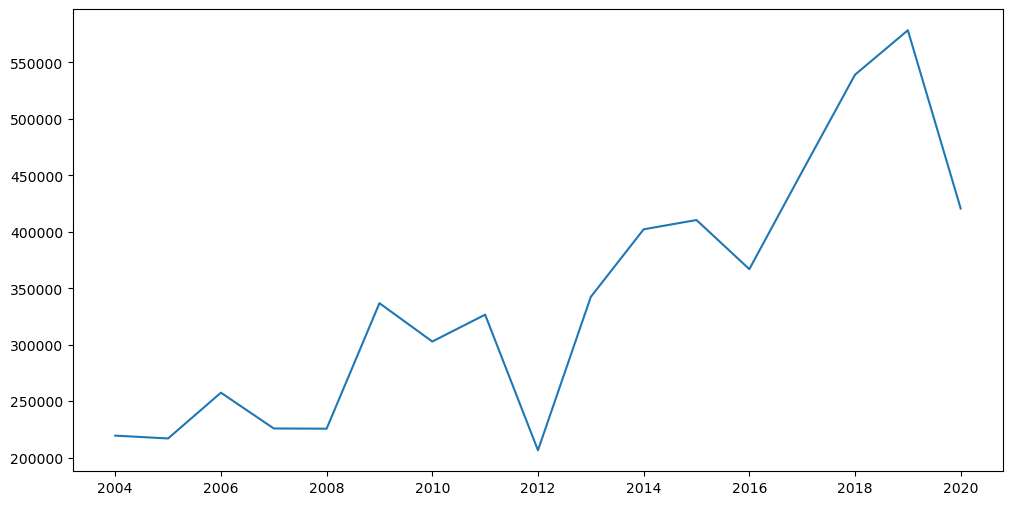

In [36]:
plt.figure(figsize=[12,6])
plt.plot(num_sightings_year['year'], num_sightings_year['count'])

### Sightings per species

In [37]:
Species_Top_15_counts = df_UKBMS2[['species']].value_counts().sort_values(ascending=False).head(15)
Species_Top_15_counts

species              
Maniola jurtina          801113
Pararge aegeria          508404
Pieris rapae             423934
Pieris napi              354088
Pyronia tithonus         349425
Pieris brassicae         338501
Aphantopus hyperantus    333066
Polyommatus icarus       295048
Aglais io                267588
Coenonympha pamphilus    229837
Gonepteryx rhamni        227730
Vanessa atalanta         154053
Aglais urticae           151070
Melanargia galathea      144309
Ochlodes venata          139131
Name: count, dtype: int64

In [38]:
Species_Top_15_counts.sum()

4717297

In [39]:
Species_Top_15_Perc = Species_Top_15_counts.sum() / df_UKBMS2[['species']].value_counts().sum() *100
print(f'The top 15 Species account for {round(Species_Top_15_Perc,2)}% of the butterflies sightings in the dataset.')

The top 15 Species account for 80.88% of the butterflies sightings in the dataset.


In [40]:
Species_Top_15_list = pd.DataFrame(Species_Top_15_counts)
Species_Top_15_list = Species_Top_15_list.reset_index()
Species_Top_15_list = list(Species_Top_15_list['species'].unique())
Species_Top_15_list

['Maniola jurtina',
 'Pararge aegeria',
 'Pieris rapae',
 'Pieris napi',
 'Pyronia tithonus',
 'Pieris brassicae',
 'Aphantopus hyperantus',
 'Polyommatus icarus',
 'Aglais io',
 'Coenonympha pamphilus',
 'Gonepteryx rhamni',
 'Vanessa atalanta',
 'Aglais urticae',
 'Melanargia galathea',
 'Ochlodes venata']

In [41]:
Species_Top_15_df = df_UKBMS2[df_UKBMS2['species'].isin(Species_Top_15_list)]
Species_Top_15_df.head(3)

Unnamed: 0      gbifID       family       genus                species  \
0           0  2910290306     Pieridae      Pieris           Pieris rapae   
2           2  3353837304  Nymphalidae  Aphantopus  Aphantopus hyperantus   
3           3  2910290326  Nymphalidae     Maniola        Maniola jurtina   

  verbatimScientificName countryCode stateProvince  decimalLatitude  \
0           Pieris rapae          GB       England        51.438260   
2  Aphantopus hyperantus          GB       England        52.250415   
3        Maniola jurtina          GB       England        51.212287   

   decimalLongitude  eventDate  day  month  year  taxonKey  speciesKey  \
0         -0.238955 2007-06-17   17      6  2007   1920496     1920496   
2          1.609902 2005-07-09    9      7  2005   1896841     1896841   
3         -3.125219 2012-08-10   10      8  2012   5135513     5135513   

  Year_Month  
0    2007-06  
2    2005-07  
3    2012-08

In [42]:
Species_Top_15_Month1 = Species_Top_15_df.groupby('species')['Year_Month'].value_counts()
Species_Top_15_Month1 = pd.DataFrame(Species_Top_15_Month1)
Species_Top_15_Month1 = Species_Top_15_Month1.reset_index()
Species_Top_15_Month1 = Species_Top_15_Month1.sort_values(['species','Year_Month'])
Species_Top_15_Month1.head(3)

species Year_Month  count
109  Aglais io    2004-03    116
35   Aglais io    2004-04   3083
56   Aglais io    2004-05   1997

In [43]:
# Code help: https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html#plotly.graph_objects.Scatter
# Code help2: https://plotly.com/python/subplots/

fig = make_subplots(rows=15, cols=1)

for i in range(len(Species_Top_15_list)):
    area = go.Scatter(x=Species_Top_15_Month1[Species_Top_15_Month1['species'] == Species_Top_15_list[i]]['Year_Month'], 
                      y=Species_Top_15_Month1[Species_Top_15_Month1['species'] == Species_Top_15_list[i]]['count'],
                      stackgroup='one', hoverinfo='all', 
                      hovertext=Species_Top_15_Month1[Species_Top_15_Month1['species'] == Species_Top_15_list[i]]['species'])

    fig.append_trace(area, row=i+1, col=1)

    fig.update_yaxes(title_text=f'{Species_Top_15_list[i]}')

fig.update_layout(height=2500, width=1200, title_text="Top 15 Butterflies species spotted in the UK over the last 20 years")

fig.show()

In [44]:
Species_Top_15_Month = Species_Top_15_df.groupby('species')['Year_Month'].value_counts()
Species_Top_15_Month = pd.DataFrame(Species_Top_15_Month)
Species_Top_15_Month = Species_Top_15_Month.reset_index()
Species_Top_15_Month = Species_Top_15_Month.pivot(index='Year_Month', columns='species', values='count')
Species_Top_15_Month.head(3)

species     Aglais io  Aglais urticae  Aphantopus hyperantus  \
Year_Month                                                     
2004-03         116.0           111.0                    5.0   
2004-04        3083.0          2069.0                    NaN   
2004-05        1997.0           945.0                    NaN   

species     Coenonympha pamphilus  Gonepteryx rhamni  Maniola jurtina  \
Year_Month                                                              
2004-03                      35.0              124.0             69.0   
2004-04                       1.0             2216.0              NaN   
2004-05                    1034.0             2858.0              7.0   

species     Melanargia galathea  Ochlodes venata  Pararge aegeria  \
Year_Month                                                          
2004-03                     6.0              3.0             40.0   
2004-04                     NaN              NaN            694.0   
2004-05                     1.0             24.0           2481.0   

species     Pieris brassicae  Pieris napi  Pieris rapae  Polyommatus icarus  \
Year_Month                                                                    
2004-03                 36.0         49.0          41.0                36.0   
2004-04                 91.0        408.0         309.0                 6.0   
2004-05               1047.0       4094.0        2063.0              1304.0   

species     Pyronia tithonus  Vanessa atalanta  
Year_Month                                      
2004-03                 28.0              12.0  
2004-04                  NaN              51.0  
2004-05                  1.0              55.0

In [45]:
fig = px.area(Species_Top_15_Month, facet_col='species', facet_col_wrap=2)
fig.show()

In [47]:
# for i in range(len(Species_Top_15_list)):
    # Species_Top_15_Month_perspe = Species_Top_15_Month[Species_Top_15_Month['species'] == Species_Top_15_list[i]]
    
    # fig = px.area(Species_Top_15_Month_perspe, x='Year_Month', y='count', facet_col='species', facet_col_wrap=2)
    # fig.show()

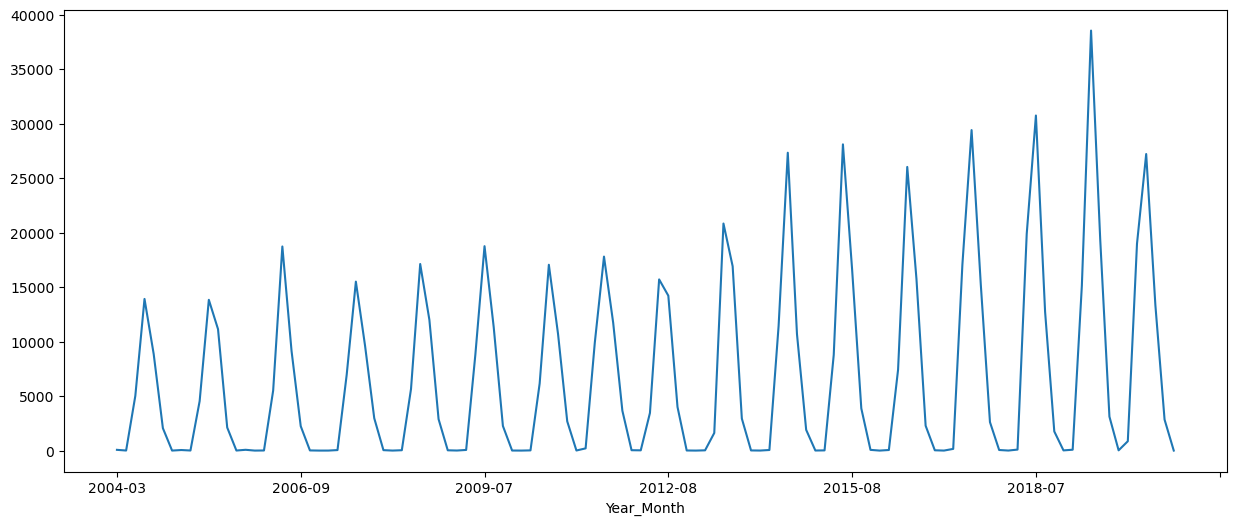

In [48]:
Species_Top_15_1 = df_UKBMS2[df_UKBMS2['species'] == 'Maniola jurtina']
plt.figure(figsize=[15,6])
Species_Top_15_1.groupby('Year_Month')['eventDate'].count().plot()
plt.show()

In [49]:
Species_Top_15_1 = df_UKBMS2[df_UKBMS2['species'] == 'Maniola jurtina'].groupby('Year_Month')['eventDate'].count()
Species_Top_15_1 = pd.DataFrame(Species_Top_15_1)
Species_Top_15_1 = Species_Top_15_1.reset_index()
Species_Top_15_1.head(3)

Year_Month  eventDate
0    2004-03         69
1    2004-05          7
2    2004-06       5020

In [51]:
# fig = px.area(Species_Top_15, x='Year_Month', y='eventDate', facet_col='species')
# fig.show()

In [52]:
Species_Top_15_1

Year_Month  eventDate
0      2004-03         69
1      2004-05          7
2      2004-06       5020
3      2004-07      13920
4      2004-08       8859
..         ...        ...
111    2020-06      18990
112    2020-07      27223
113    2020-08      13355
114    2020-09       2846
115    2020-10          2

[116 rows x 2 columns]

In [53]:
# Species[0]

NameError: name 'Species' is not defined

In [ ]:
# len(Species)

In [ ]:
# for i in range(len(Species)):
    # print(Species[i])

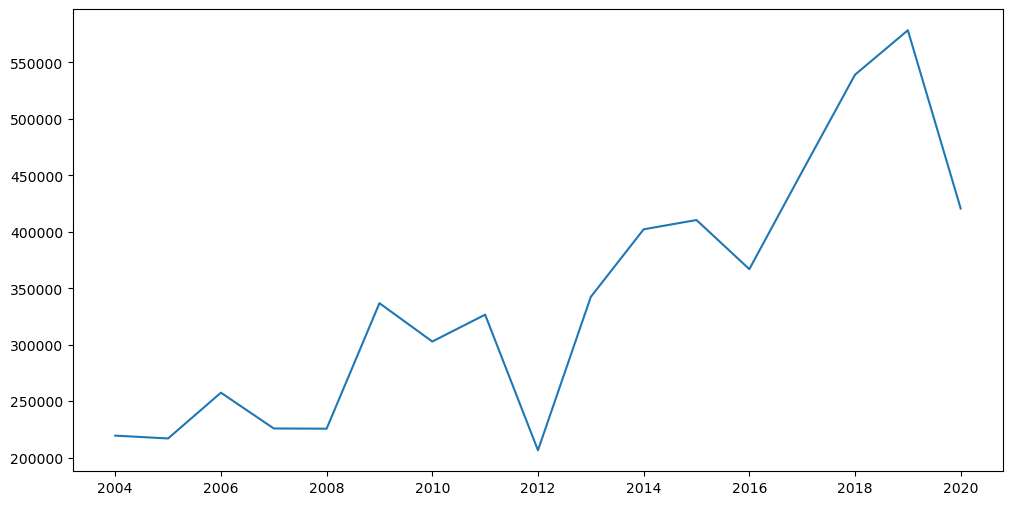

In [54]:
num_sightings_year = df_UKBMS2['year'].value_counts()
num_sightings_year = pd.DataFrame(num_sightings_year)
num_sightings_year = num_sightings_year.reset_index()
num_sightings_year = num_sightings_year.sort_values('year')
plt.figure(figsize=[12,6])
plt.plot(num_sightings_year['year'], num_sightings_year['count'])

### Endangered Species

In [55]:
# Check if we have duplicated values in redlist['Species_ScientificName']
df_redlist['Species_ScientificName'].duplicated().sum()

0

In [124]:
# Checking values for Red List category
df_redlist['Red List category'].value_counts()

Red List category
Least Concern         29
Vulnerable            16
Endangered             8
Near Threatened        5
Regionally Extinct     4
Name: count, dtype: int64

In [125]:
# Getting the list of species most vulnerable (all categories except 'Least Concern')
rlcat = ['Vulnerable', 'Endangered', 'Near Threatened', 'Regionally Extinct']
redlist = df_redlist[df_redlist['Red List category'].isin(rlcat)]
redlist = list(redlist['Species_ScientificName'])

In [126]:
# Filtering the UKBMS dataset to get only the sightings for vunerable species
df_UKBMS_redlist = df_UKBMS2[df_UKBMS2['species'].isin(redlist)]

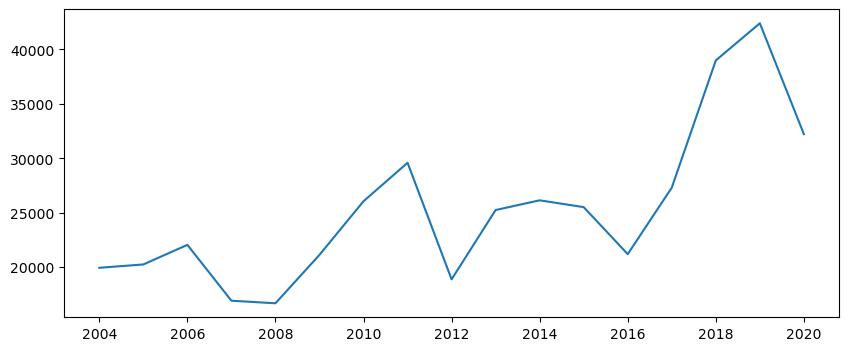

In [128]:
# Creating a plot for all most vulnerable species sightings over time
num_sightings_year_redlist = df_UKBMS_redlist['year'].value_counts()
num_sightings_year_redlist = pd.DataFrame(num_sightings_year_redlist)
num_sightings_year_redlist = num_sightings_year_redlist.reset_index()
num_sightings_year_redlist = num_sightings_year_redlist.sort_values('year')

plt.figure(figsize=[10,4])
plt.plot(num_sightings_year_redlist['year'], num_sightings_year_redlist['count'])

In [129]:
# Creating plots for each most vulnerable species sightings over time
Species_RedList_Month = df_UKBMS_redlist.groupby('species')['Year_Month'].value_counts()
Species_RedList_Month = pd.DataFrame(Species_RedList_Month)
Species_RedList_Month = Species_RedList_Month.reset_index()
Species_RedList_Month = Species_RedList_Month.sort_values(['species','Year_Month'])
Species_RedList_Month.head(3)

species Year_Month  count
66  Aricia artaxerxes    2004-03      1
65  Aricia artaxerxes    2004-05      1
14  Aricia artaxerxes    2004-06    226

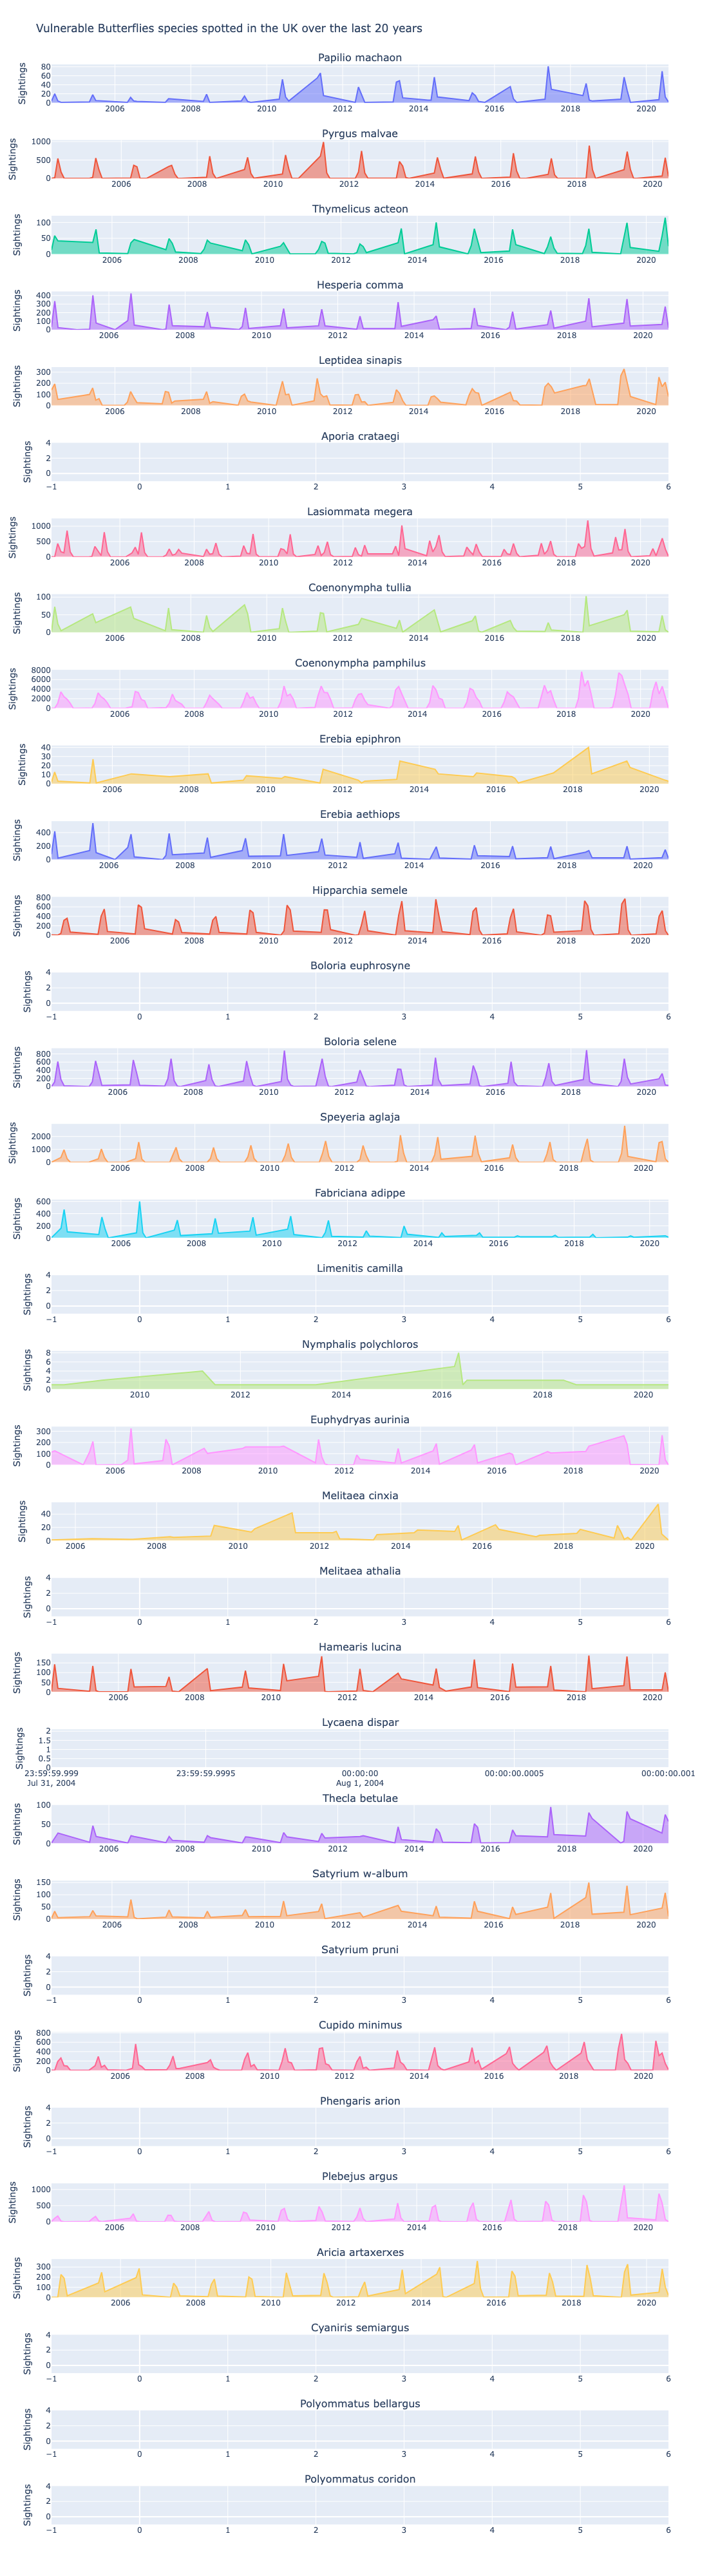

In [130]:
fig = make_subplots(rows=33, cols=1, subplot_titles=redlist)

for i in range(len(redlist)):
    area = go.Scatter(x=Species_RedList_Month[Species_RedList_Month['species'] == redlist[i]]['Year_Month'], 
                      y=Species_RedList_Month[Species_RedList_Month['species'] == redlist[i]]['count'], 
                      stackgroup='one', hoverinfo='all', 
                      hovertext=Species_RedList_Month[Species_RedList_Month['species'] == redlist[i]]['species'])

    fig.append_trace(area, row=i+1, col=1)

    fig.update_yaxes(title_text='Sightings')

fig.update_layout(height=4000, width=1200, showlegend=False,
                  title_text="Vulnerable Butterflies species spotted in the UK over the last 20 years")

fig.show()

### SpeciesKey across the Datasets

In [22]:
df_UKBMS3 = pd.merge(df_UKBMS2, df_LepTraits, left_on='species', right_on='Species', how='left')
df_UKBMS3.head(5)

Unnamed: 0      gbifID       family       genus                species  \
0           0  2910290306     Pieridae      Pieris           Pieris rapae   
1           1  2910290312  Nymphalidae     Vanessa         Vanessa cardui   
2           2  3353837304  Nymphalidae  Aphantopus  Aphantopus hyperantus   
3           3  2910290326  Nymphalidae     Maniola        Maniola jurtina   
4           4  2910290332  Nymphalidae      Aglais         Aglais urticae   

  verbatimScientificName countryCode stateProvince  decimalLatitude  \
0           Pieris rapae          GB       England        51.438260   
1         Vanessa cardui          GB       England        52.563293   
2  Aphantopus hyperantus          GB       England        52.250415   
3        Maniola jurtina          GB       England        51.212287   
4         Aglais urticae          GB       England        54.190666   

   decimalLongitude  ...                   EdgeAffinity  \
0         -0.238955  ...         Edge-associated (weak)   
1         -0.312267  ...  Seen near and away from edges   
2          1.609902  ...       Edge-associated (strong)   
3         -3.125219  ...       Edge-associated (strong)   
4         -2.790759  ...        Edge association varies   

            MoistureAffinity              DisturbanceAffinity  \
0                       Both  Disturbance-associated (strong)   
1                       Both    Disturbance-associated (weak)   
2  Xeric-associated (strong)  Disturbance-associated (strong)   
3                       Both    Disturbance-associated (weak)   
4  Mesic-associated (strong)  Disturbance-associated (strong)   

   NumberOfHostplantFamilies  SoleHostplantFamily  PrimaryHostplantFamily  \
0                        8.0                  NaN            Brassicaceae   
1                       24.0                  NaN              Asteraceae   
2                        2.0                  NaN                 Poaceae   
3                        1.0              Poaceae                     NaN   
4                        4.0                  NaN              Urticaceae   

  SecondaryHostplantFamily EqualHostplantFamily NumberOfHostplantAccounts  \
0                      NaN                  NaN                      16.0   
1                      NaN                  NaN                      35.0   
2               Cyperaceae                  NaN                       3.0   
3                      NaN                  NaN                       3.0   
4                      NaN                  NaN                       8.0   

      DateCreated  
0  3/9/2022 15:23  
1  3/9/2022 15:23  
2  3/9/2022 15:23  
3  3/9/2022 15:23  
4  3/9/2022 15:23  

[5 rows x 59 columns]

In [23]:
df_UKBMS2.shape

(5832272, 16)

In [24]:
df_UKBMS3.shape

(5845187, 59)

In [25]:
df_UKBMS2.shape[0] - df_UKBMS3.shape[0]

-12915

In [26]:
df_UKBMS3['species'].isna().sum()

0

In [27]:
df_UKBMS3.duplicated().sum()

0

In [28]:
df_UKBMS3.groupby('species')['Species'].nunique().describe()

count    71.000000
mean      0.802817
std       0.400704
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Species, dtype: float64

In [29]:
df_UKBMS3 = df_UKBMS3.rename(columns={'Unnamed: 0': 'Index_2'})

In [30]:
df_UKBMS3[(df_UKBMS3.index == df_UKBMS3['Index_2']) == False].head(3)

Index_2      gbifID       family     genus           species  \
163      162  2910357468  Hesperiidae  Hesperia    Hesperia comma   
164      163  2910357475  Nymphalidae   Vanessa  Vanessa atalanta   
165      164  2914157569  Nymphalidae   Pararge   Pararge aegeria   

    verbatimScientificName countryCode stateProvince  decimalLatitude  \
163         Hesperia comma          GB       England        50.793273   
164       Vanessa atalanta          GB       England        54.759287   
165        Pararge aegeria          GB       England        51.861697   

     decimalLongitude  ...                       EdgeAffinity  \
163          0.148188  ...                                NaN   
164         -1.807280  ...             Edge-associated (weak)   
165          0.242285  ...  No evidence for edge associations   

              MoistureAffinity              DisturbanceAffinity  \
163  Mesic-associated (strong)                              NaN   
164    Mesic-associated (weak)  Disturbance-associated (strong)   
165  Mesic-associated (strong)  Disturbance-associated (strong)   

     NumberOfHostplantFamilies  SoleHostplantFamily  PrimaryHostplantFamily  \
163                        1.0           Cyperaceae                     NaN   
164                        4.0                  NaN              Urticaceae   
165                        1.0              Poaceae                     NaN   

    SecondaryHostplantFamily EqualHostplantFamily NumberOfHostplantAccounts  \
163                      NaN                  NaN                       2.0   
164                      NaN                  NaN                      14.0   
165                      NaN                  NaN                       2.0   

        DateCreated  
163  3/9/2022 15:23  
164  3/9/2022 15:23  
165  3/9/2022 15:23  

[3 rows x 59 columns]

In [31]:
df_UKBMS3.iloc[161:164,:]

Index_2      gbifID       family      genus            species  \
161      161  2910357464  Nymphalidae  Polygonia  Polygonia c-album   
162      162  2910357468  Hesperiidae   Hesperia     Hesperia comma   
163      162  2910357468  Hesperiidae   Hesperia     Hesperia comma   

    verbatimScientificName countryCode stateProvince  decimalLatitude  \
161      Polygonia c-album          GB       England        51.364290   
162         Hesperia comma          GB       England        50.793273   
163         Hesperia comma          GB       England        50.793273   

     decimalLongitude  ...              EdgeAffinity  \
161         -0.787648  ...   Edge association varies   
162          0.148188  ...  Edge-associated (strong)   
163          0.148188  ...                       NaN   

              MoistureAffinity             DisturbanceAffinity  \
161  Mesic-associated (strong)   Disturbance-avoidant (strong)   
162  Xeric-associated (strong)  Disturbance association varies   
163  Mesic-associated (strong)                             NaN   

     NumberOfHostplantFamilies  SoleHostplantFamily  PrimaryHostplantFamily  \
161                       10.0                  NaN                     NaN   
162                        2.0                  NaN                 Poaceae   
163                        1.0           Cyperaceae                     NaN   

    SecondaryHostplantFamily EqualHostplantFamily NumberOfHostplantAccounts  \
161                      NaN                  NaN                       7.0   
162                 Fabaceae                  NaN                       8.0   
163                      NaN                  NaN                       2.0   

        DateCreated  
161  3/9/2022 15:23  
162  3/9/2022 15:23  
163  3/9/2022 15:23  

[3 rows x 59 columns]

In [32]:
df_LepTraits.set_index('Species').loc['Hesperia comma', :]

Family     Genus    verbatimSpecies  WS_L_Fem  WS_U_Fem  \
Species                                                                        
Hesperia comma  Hesperiidae  Hesperia     Hesperia comma       2.8       3.4   
Hesperia comma  Hesperiidae  Hesperia  Hesperia florinda       NaN       NaN   

                WS_L_Mal  WS_U_Mal      WS_L      WS_U  FW_L_Fem  ...  \
Species                                                           ...   
Hesperia comma       2.4       3.3  2.557143  3.157143       NaN  ...   
Hesperia comma       NaN       NaN       NaN       NaN       NaN  ...   

                            EdgeAffinity           MoistureAffinity  \
Species                                                               
Hesperia comma  Edge-associated (strong)  Xeric-associated (strong)   
Hesperia comma                       NaN  Mesic-associated (strong)   

                           DisturbanceAffinity  NumberOfHostplantFamilies  \
Species                                                                     
Hesperia comma  Disturbance association varies                        2.0   
Hesperia comma                             NaN                        1.0   

                SoleHostplantFamily  PrimaryHostplantFamily  \
Species                                                       
Hesperia comma                  NaN                 Poaceae   
Hesperia comma           Cyperaceae                     NaN   

                SecondaryHostplantFamily  EqualHostplantFamily  \
Species                                                          
Hesperia comma                  Fabaceae                   NaN   
Hesperia comma                       NaN                   NaN   

                NumberOfHostplantAccounts     DateCreated  
Species                                                    
Hesperia comma                        8.0  3/9/2022 15:23  
Hesperia comma                        2.0  3/9/2022 15:23  

[2 rows x 42 columns]

In [15]:
# Confirming there is only 1 speciesKEy per species in Dataset 1 (UKBMS)
df_UKBMS2.groupby('species')['speciesKey'].nunique().describe()

count    71.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: speciesKey, dtype: float64

In [16]:
speciesKey = df_UKBMS2[['species', 'speciesKey']]
speciesKey = speciesKey.groupby('species')['speciesKey'].value_counts()
speciesKey = pd.DataFrame(speciesKey)
speciesKey = speciesKey.reset_index()
speciesKey.head(3)

species  speciesKey   count
0        Aglais io     4535827  267588
1   Aglais urticae     1894840  151070
2  Anarta myrtilli     1789580      15

__COMMENT:__ Creating a speciesKey field in Dataset 2 (LepTraits)

In [17]:
# Checking no NA in keys for both datasets

In [18]:
df_LepTraits['Species'].isna().sum()

0

In [19]:
# Checking if we have only one value per key in both datasets

In [20]:
doublons = df_LepTraits['Species'].value_counts() >1
doublons = pd.DataFrame(doublons)
doublons = doublons.reset_index()
doublons = doublons[doublons['count'] == True]
doublons = list(doublons['Species'])
df_LepTraits[df_LepTraits['Species'].isin(doublons) == True]

Family         Genus                Species  \
6      Hesperiidae       Abantis     Abantis elegantula   
7      Hesperiidae       Abantis     Abantis elegantula   
23     Hesperiidae  Abraximorpha      Abraximorpha esta   
24     Hesperiidae  Abraximorpha      Abraximorpha esta   
225    Hesperiidae      Apallaga  Apallaga occidentalis   
...            ...           ...                    ...   
11720   Riodinidae        Emesis         Emesis aurimna   
12202   Riodinidae    Praetaxila     Praetaxila satraps   
12203   Riodinidae    Praetaxila     Praetaxila satraps   
12373   Riodinidae        Theope        Theope decorata   
12374   Riodinidae        Theope        Theope decorata   

             verbatimSpecies  WS_L_Fem  WS_U_Fem  WS_L_Mal  WS_U_Mal   WS_L  \
6         Abantis elegantula       NaN       4.1       3.8       3.9  2.689   
7             Abantis venosa       NaN       4.1       3.8       3.9  2.689   
23         Abraximorpha esta       NaN       NaN       NaN       NaN  3.900   
24      Abraximorpha davidii       NaN       NaN       NaN       NaN  3.900   
225    Apallaga occidentalis       NaN       NaN       NaN       NaN    NaN   
...                      ...       ...       ...       ...       ...    ...   
11720         Emesis lucinda       NaN       NaN       NaN       NaN    NaN   
12202     Praetaxila satraps       NaN       5.5       NaN       5.0    NaN   
12203      Praetaxila huntei       NaN       NaN       NaN       NaN    NaN   
12373        Theope decorata       NaN       NaN       NaN       NaN  2.200   
12374        Theope thestias       NaN       NaN       NaN       NaN  2.200   

           WS_U  ...              EdgeAffinity  \
6      3.246500  ...    Edge-avoidant (strong)   
7      3.662000  ...    Edge-avoidant (strong)   
23     4.500000  ...                       NaN   
24     4.500000  ...  Edge-associated (strong)   
225         NaN  ...                       NaN   
...         ...  ...                       ...   
11720  4.500000  ...                       NaN   
12202       NaN  ...                       NaN   
12203       NaN  ...                       NaN   
12373  2.433333  ...                       NaN   
12374  2.450000  ...  Edge-associated (strong)   

                           MoistureAffinity  \
6                 Xeric-associated (strong)   
7                   Xeric-associated (weak)   
23                                      NaN   
24     No evidence for moisture association   
225                                     NaN   
...                                     ...   
11720                                   NaN   
12202                                   NaN   
12203                                   NaN   
12373             Mesic-associated (strong)   
12374                                   NaN   

                             DisturbanceAffinity  NumberOfHostplantFamilies  \
6                                            NaN                        1.0   
7                                            NaN                        2.0   
23                                           NaN                        2.0   
24               Disturbance-associated (strong)                        2.0   
225                                          NaN                        NaN   
...                                          ...                        ...   
11720                                        NaN                        NaN   
12202  Seen near and away from disturbed habitat                        NaN   
12203  Seen near and away from disturbed habitat                        NaN   
12373                                        NaN                        NaN   
12374            Disturbance-associated (strong)                        NaN   

       SoleHostplantFamily  PrimaryHostplantFamily  SecondaryHostplantFamily  \
6                 Fabaceae                     NaN                       NaN   
7                      NaN               Malvaceae                  Fabaceae   

In [21]:
doublons2 = df_LepTraits['verbatimSpecies'].value_counts() >1
doublons2 = pd.DataFrame(doublons2)
doublons2 = doublons2.reset_index()
doublons2 = doublons2[doublons2['count'] == True]
doublons2 = list(doublons2['verbatimSpecies'])
df_LepTraits[df_LepTraits['verbatimSpecies'].isin(doublons2) == True]

Family         Genus               Species       verbatimSpecies  \
7      Hesperiidae       Abantis    Abantis elegantula        Abantis venosa   
19     Hesperiidae       Abantis        Abantis venosa        Abantis venosa   
22     Hesperiidae  Abraximorpha  Abraximorpha davidii  Abraximorpha davidii   
24     Hesperiidae  Abraximorpha     Abraximorpha esta  Abraximorpha davidii   
190    Hesperiidae      Apallaga      Apallaga confusa      Apallaga confusa   
...            ...           ...                   ...                   ...   
11731   Riodinidae        Emesis        Emesis lucinda        Emesis lucinda   
12201   Riodinidae    Praetaxila     Praetaxila huntei     Praetaxila huntei   
12203   Riodinidae    Praetaxila    Praetaxila satraps     Praetaxila huntei   
12374   Riodinidae        Theope       Theope decorata       Theope thestias   
12414   Riodinidae        Theope       Theope thestias       Theope thestias   

       WS_L_Fem  WS_U_Fem  WS_L_Mal  WS_U_Mal   WS_L   WS_U  ...  \
7           NaN       4.1       3.8       3.9  2.689  3.662  ...   
19          NaN       4.1       3.8       3.9  2.689  3.662  ...   
22          NaN       NaN       NaN       NaN  3.900  4.500  ...   
24          NaN       NaN       NaN       NaN  3.900  4.500  ...   
190         NaN       NaN       NaN       NaN    NaN    NaN  ...   
...         ...       ...       ...       ...    ...    ...  ...   
11731       NaN       NaN       NaN       NaN    NaN  4.500  ...   
12201       NaN       NaN       NaN       NaN    NaN    NaN  ...   
12203       NaN       NaN       NaN       NaN    NaN    NaN  ...   
12374       NaN       NaN       NaN       NaN  2.200  2.450  ...   
12414       NaN       NaN       NaN       NaN  2.200  2.450  ...   

                   EdgeAffinity                      MoistureAffinity  \
7        Edge-avoidant (strong)               Xeric-associated (weak)   
19       Edge-avoidant (strong)               Xeric-associated (weak)   
22     Edge-associated (strong)  No evidence for moisture association   
24     Edge-associated (strong)  No evidence for moisture association   
190                         NaN                                   NaN   
...                         ...                                   ...   
11731                       NaN                                   NaN   
12201                       NaN                                   NaN   
12203                       NaN                                   NaN   
12374  Edge-associated (strong)                                   NaN   
12414  Edge-associated (strong)                                   NaN   

                             DisturbanceAffinity  NumberOfHostplantFamilies  \
7                                            NaN                        2.0   
19                                           NaN                        2.0   
22               Disturbance-associated (strong)                        2.0   
24               Disturbance-associated (strong)                        2.0   
190                                          NaN                        NaN   
...                                          ...                        ...   
11731                                        NaN                        NaN   
12201  Seen near and away from disturbed habitat                        NaN   
12203  Seen near and away from disturbed habitat                        NaN   
12374            Disturbance-associated (strong)                        NaN   
12414            Disturbance-associated (strong)                        NaN   

       SoleHostplantFamily  PrimaryHostplantFamily  SecondaryHostplantFamily  \
7                      NaN               Malvaceae                  Fabaceae   
19                     NaN               Malvaceae                  Fabaceae   
22                     NaN                Rosaceae                 Lauraceae   
24                     NaN                Rosaceae                 Lauraceae   
190     

# End

## Notes - next steps
- Check endangered species
- Match against
    - UKBMS => how many?
    - LepTraits => info for all of them?
 
- Endangered => logistic regression?
- Map Plotly endangered


